# Proyek Analisis Data: [E-commerce-public-dataset]
- **Nama:** Muhammad Rizki Putra
- **Email:** rizkiputra2626@gmail.com
- **ID Dicoding:** rizki-putra

## Menentukan Pertanyaan Bisnis

- 5 Kota mana saja yang memiliki pelanggan terbanyak di 2 kuartal terakhir tahun 2017?
- 5 Kota mana saja yang memiliki pengiriman terlambat & tercepat di 2 kuartal terakhir tahun 2017?
- Distribusi geografis pengiriman di Brasil berdasarkan kota pada 2 kuartal terakhir tahun 2017?

## Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np #Untuk operasi matermatis
import pandas as pd #Untuk kebutuhan data wrangling
import matplotlib.pyplot as plt #Untuk visualisasi data

## Data Wrangling

### Gathering Data

In [5]:
customer_df = pd.read_csv("data/customers_dataset.csv",delimiter=",") #Read data dari file csv dataset customer
customer_df.head() #Print baris header dari dataset customer beserta dengan beberapa data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
orders_df = pd.read_csv("data/orders_dataset.csv",delimiter=",") #Read data dari file csv dataset order
orders_df.head() #Print baris header dari dataset order beserta dengan beberapa data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
geolocation_df = pd.read_csv("data/geolocation_dataset.csv", delimiter=",") 
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Insight:**
- Berhasil dibuatkan data frame customer dengan head tabel customer_id, customer_unique_id, customer_zip_code_prefix, customer_city,dan customer_state
- Berhasil dibuatkan data frame order dengan head tabel order_id, customer_id, order_status, order_purchase_timestamporder_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date
- Berhasil dibuatkan data frame geolocation dengan head tabel, geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city,dan geolocation_state

### Assessing Data

In [8]:
customer_df.info() #Mengecek df customer dari segi object type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [9]:
customer_df.isna().sum() #Mengecek df customer dari segi jumlah data yang kosong

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [10]:
print(f"Jumlah data customer yang ganda : {customer_df.duplicated().sum()}") #Mengecek df customer dari segi data yang terduplikasi

Jumlah data customer yang ganda : 0


In [11]:
customer_df.describe() #Mengecek df customer dari segi keanehan data

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [12]:
orders_df.info() #Mengecek df order dari segi object type, ditemukan kolum tanggal berupa objek yang seharusnya date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [13]:
orders_df.isna().sum() #Mengecek df order dari segi data yang kosong, ditemukan beberapa data yang kosong di 3 kolum

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [14]:
print(f"Order yang ganda: {orders_df.duplicated().sum()}") #Mengecek df order dari segi data yang terduplikasi

Order yang ganda: 0


In [15]:
orders_df.describe() #Mengecek df order dari segi keanehan data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [16]:
geolocation_df.info() #Melakukan pengecekan keanehan type data pada df geolocation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [17]:
geolocation_df.isna().sum() #pengecekan data hilang pada data frame geo

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [18]:
print(f"Data ganda pada geolocation : {geolocation_df.duplicated().sum()}") #Karena merupakan data lokasi yang memiliki banyak data ganda kota maka dapat diabaikan

Data ganda pada geolocation : 261831


In [19]:
geolocation_df.describe() #pengecekan data abnormal pada geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


**Insight:**
- Data frame customer tidak ada keanehan data sehingga tidak perlu di berishkan.
- Data frame order terdapat beberapa data yang hilang di bagian date. Lalu terdapat beberapa type data yang salah, sehingga data frame order perlu dibersihkan.
- Data frame geolocation tidak ada keanehan data sehingga tidak perlu di bersihkan

### Cleaning Data

In [20]:
orders_df["order_approved_at"] = pd.to_datetime(orders_df["order_approved_at"], errors='coerce') #Mengubah order_approved_at dari type object ke datetime
orders_df["order_delivered_carrier_date"] = pd.to_datetime(orders_df["order_delivered_carrier_date"], errors='coerce') #Mengubah order_delivered_carrier_date dari type object ke datetime
orders_df["order_delivered_customer_date"] = pd.to_datetime(orders_df["order_delivered_customer_date"], errors='coerce') #Mengubah order_delivered_customer_date dari type object ke datetime
orders_df["order_estimated_delivery_date"] = pd.to_datetime(orders_df["order_estimated_delivery_date"], errors='coerce') #Mengubah order_estimated_delivery_date dari type object ke datetime
orders_df["order_purchase_timestamp"] = pd.to_datetime(orders_df["order_purchase_timestamp"], errors='coerce') #Mengubah order_purchase_timestamp dari type object ke datetime

In [21]:
orders_df.order_approved_at.interpolate(method="linear", limit_direction="both", inplace=True)#Melakukan interpolasi menggunakan direksi "both" terhadap order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date untuk mengisi data yang kosong. Alasan menggunakna direksi both karena data yang hilang merupakan didalam dan bukan di ujung dan di akhir
orders_df.order_delivered_carrier_date.interpolate(method="linear", limit_direction="both", inplace=True)
orders_df.order_delivered_customer_date.interpolate(method="linear", limit_direction="both", inplace=True)

**Insight:**
- Berhasil mengubah type data pada dataframe order, serta mengisi data yang hilang menggunakan teknik interpolasi dengan direksi both.

## Exploratory Data Analysis (EDA)

### Explore ...

In [22]:
#Membuat data frame gabungan dari customer dan order menggunakan irisan inner pada kolom customer_id
full_df = pd.merge(
    customer_df,
    orders_df,
    on="customer_id",
    how="inner"
)

full_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05


In [23]:
#Melakukan filter data pada waktu yang sudah ditentukan yakni 2 kuartil terkahir 2017
filtered_date_df = full_df[
    (full_df["order_purchase_timestamp"] > "2017-06-01") &
    (full_df["order_purchase_timestamp"] < "2017-12-01")
    ]

filtered_date_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,2017-09-28 17:32:43,2017-10-04
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,2017-11-27 12:44:36,2017-12-08
10,9fb35e4ed6f0a14a4977cd9aea4042bb,2a7745e1ed516b289ed9b29c7d0539a5,39400,montes claros,MG,8428e578bb1cf839ae26a6b7615502b9,delivered,2017-11-27 17:23:20,2017-11-27 18:01:20,2017-11-28 23:04:41,2017-12-08 22:16:17,2017-12-20
12,b2d1536598b73a9abd18e0d75d92f0a3,918dc87cd72cd9f6ed4bd442ed785235,18682,lencois paulista,SP,83d8f70418eefd96f37b483dff430305,delivered,2017-09-09 09:54:57,2017-09-09 10:10:17,2017-09-12 12:42:43,2017-09-20 20:23:34,2017-10-02
19,49d0ea0986edde72da777f15456a0ee0,3e6fd6b2f0d499456a6a6820a40f2d79,68485,pacaja,PA,ab797176e01c2fa3d13aa1fe3e63d9ee,delivered,2017-11-01 21:54:10,2017-11-01 22:06:00,2017-11-06 15:43:02,2017-12-02 01:09:29,2017-12-12
...,...,...,...,...,...,...,...,...,...,...,...,...
99414,eabf770240659f7a6d09b11f12f10f89,065b9e6198f11dbdf7fc1250f9e08afc,19905,ourinhos,SP,9524a52b2633d2f96da98b947c60a4de,delivered,2017-11-08 12:41:52,2017-11-08 13:30:46,2017-11-14 16:08:53,2017-11-21 18:57:38,2017-12-14
99423,c6ece8a5137f3c9c3a3a12302a19a2ac,aaf22868003377e859049dcf5f0b3fdf,1323,sao paulo,SP,52b783557d95971d0b42195e6bacdc68,delivered,2017-10-20 07:16:27,2017-10-20 07:28:14,2017-10-23 19:13:38,2017-10-24 17:03:38,2017-11-01
99426,935993f47af1ed7d0715c26b686341c5,4452b8ef472646c4cc042cb31a291f3b,12236,sao jose dos campos,SP,e86b1b2dd48839d7351406434afb578d,delivered,2017-11-25 00:31:20,2017-11-25 02:33:11,2017-11-27 18:24:54,2017-12-04 21:13:10,2017-12-20
99429,1ed0c832c2dd99570a59260e71768bdf,82d46759af0369aad49084bacf85a6c3,37610,bom repouso,MG,51c6d2f460589fa7b65f2da51e860206,delivered,2017-11-14 12:04:09,2017-11-14 12:15:25,2017-11-27 20:44:47,2017-12-19 19:37:33,2017-12-12


In [24]:
customer_counts = (
    filtered_date_df.groupby(["customer_city"]) #Melakukan group by berdasarkan asal kota
    .customer_id.nunique() #Menghitung jumlah dari customer menggunakan customer id
    .reset_index() #Index direset
    .rename(columns={"customer_id": "customer_count"}) #Untuk kolom di tabel customer_counts customer id diubah menjadi customer count
    .sort_values(by="customer_count", ascending=False) #Melakukan sorting descending berdasarkan customer yang paling banyak dari daerah mana
)

customer_counts #Print tabel customer_count

,customer_city,customer_count
2379,sao paulo,4005
2088,rio de janeiro,2081
291,belo horizonte,721
357,brasilia,591
1972,porto alegre,452
...,...,...
1281,janduis,1
1279,jandaira,1
1276,jampruca,1
1275,jamapara,1


In [25]:
#Penambahan kolom delivery_time_day pada data frame filtered_date_df guna menghitung hari yang dibutuhkan untuk mengirim barang
filtered_date_df["delivery_time_day"] = ((
    filtered_date_df["order_delivered_customer_date"] - filtered_date_df["order_delivered_carrier_date"]
    ).dt.days )

filtered_date_df = filtered_date_df[filtered_date_df["delivery_time_day"] >= 0]

filtered_date_df

C:\Users\rizki\AppData\Local\Temp\ipykernel_14392\1006598501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_date_df["delivery_time_day"] = ((


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_day
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,2017-09-28 17:32:43,2017-10-04,9
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,2017-11-27 12:44:36,2017-12-08,4
10,9fb35e4ed6f0a14a4977cd9aea4042bb,2a7745e1ed516b289ed9b29c7d0539a5,39400,montes claros,MG,8428e578bb1cf839ae26a6b7615502b9,delivered,2017-11-27 17:23:20,2017-11-27 18:01:20,2017-11-28 23:04:41,2017-12-08 22:16:17,2017-12-20,9
12,b2d1536598b73a9abd18e0d75d92f0a3,918dc87cd72cd9f6ed4bd442ed785235,18682,lencois paulista,SP,83d8f70418eefd96f37b483dff430305,delivered,2017-09-09 09:54:57,2017-09-09 10:10:17,2017-09-12 12:42:43,2017-09-20 20:23:34,2017-10-02,8
19,49d0ea0986edde72da777f15456a0ee0,3e6fd6b2f0d499456a6a6820a40f2d79,68485,pacaja,PA,ab797176e01c2fa3d13aa1fe3e63d9ee,delivered,2017-11-01 21:54:10,2017-11-01 22:06:00,2017-11-06 15:43:02,2017-12-02 01:09:29,2017-12-12,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99414,eabf770240659f7a6d09b11f12f10f89,065b9e6198f11dbdf7fc1250f9e08afc,19905,ourinhos,SP,9524a52b2633d2f96da98b947c60a4de,delivered,2017-11-08 12:41:52,2017-11-08 13:30:46,2017-11-14 16:08:53,2017-11-21 18:57:38,2017-12-14,7
99423,c6ece8a5137f3c9c3a3a12302a19a2ac,aaf22868003377e859049dcf5f0b3fdf,1323,sao paulo,SP,52b783557d95971d0b42195e6bacdc68,delivered,2017-10-20 07:16:27,2017-10-20 07:28:14,2017-10-23 19:13:38,2017-10-24 17:03:38,2017-11-01,0
99426,935993f47af1ed7d0715c26b686341c5,4452b8ef472646c4cc042cb31a291f3b,12236,sao jose dos campos,SP,e86b1b2dd48839d7351406434afb578d,delivered,2017-11-25 00:31:20,2017-11-25 02:33:11,2017-11-27 18:24:54,2017-12-04 21:13:10,2017-12-20,7
99429,1ed0c832c2dd99570a59260e71768bdf,82d46759af0369aad49084bacf85a6c3,37610,bom repouso,MG,51c6d2f460589fa7b65f2da51e860206,delivered,2017-11-14 12:04:09,2017-11-14 12:15:25,2017-11-27 20:44:47,2017-12-19 19:37:33,2017-12-12,21


In [26]:
#Pembuatan tabel untuk mencari tau berapa waktu yang dibutuhkan untuk mengirim barang
delivery_time_city = (
    filtered_date_df.groupby(["customer_city"])
    .delivery_time_day.mean()
    .reset_index()
    .rename(columns={"delivery_time_day": "delivery_time_day"})
    .sort_values(by="delivery_time_day", ascending=False)
)

delivery_time_city

,customer_city,delivery_time_day
223,baguari,306.0
593,caturama,248.0
2689,vigia,205.0
2573,tombos,144.0
1712,olindina,121.5
...,...,...
113,anta,1.0
2605,tupancireta,1.0
50,alexania,1.0
776,dionisio,1.0


In [27]:

#Pegabungan tabel delivery time dan geolocation untuk mencari tau koordinat lokasi kota
temp_filtered_date_df = filtered_date_df[["customer_zip_code_prefix", "customer_city"]]
geolocation_df = geolocation_df[["geolocation_zip_code_prefix", "geolocation_lat", "geolocation_lng"]]

delivery_location_df = temp_filtered_date_df.merge(
    geolocation_df[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']],
    left_on="customer_zip_code_prefix",
    right_on="geolocation_zip_code_prefix",
    how="left"
)

delivery_location_df

,customer_zip_code_prefix,customer_city,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,89254,jaragua do sul,89254.0,-26.468503,-49.109883
1,89254,jaragua do sul,89254.0,-26.481278,-49.116976
2,89254,jaragua do sul,89254.0,-26.467770,-49.108262
3,89254,jaragua do sul,89254.0,-26.480828,-49.122365
4,89254,jaragua do sul,89254.0,-26.473864,-49.101689
...,...,...,...,...,...
4281682,92120,canoas,92120.0,-29.945771,-51.162390
4281683,92120,canoas,92120.0,-29.944954,-51.164778
4281684,92120,canoas,92120.0,-29.950813,-51.170203
4281685,92120,canoas,92120.0,-29.949313,-51.156308


In [28]:
#Pengecekan data secara umum
delivery_location_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4281687 entries, 0 to 4281686
Data columns (total 5 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   customer_zip_code_prefix     int64  
 1   customer_city                object 
 2   geolocation_zip_code_prefix  float64
 3   geolocation_lat              float64
 4   geolocation_lng              float64
dtypes: float64(3), int64(1), object(1)
memory usage: 163.3+ MB


In [29]:
#Pengecekan data kosong pada data frame delivery location
delivery_location_df.isna().sum()

customer_zip_code_prefix        0
customer_city                   0
geolocation_zip_code_prefix    82
geolocation_lat                82
geolocation_lng                82
dtype: int64

In [30]:
#Penghapusan data yang hilang menggunakan teknik drop pada df geolocation
delivery_location_df = delivery_location_df.dropna(subset=['geolocation_lng', 'geolocation_lat'])

**Insight:**
- Berhasil membuat tabel customer count untuk mencari jumlah customer terbanyak untuk menjawab pertanyaan 1
- Berhasil membuat tabel delivery time city untuk mencari waktu rata-rata yang dibutuhkan untuk mengirim barang dari tiap kota untuk menjawab pertanyaan 2
- Berhasil membuat tabel delivery location df untuk mencari tau disribusi geografi pengiriman untuk menjawab pertanyaan 3

## Visualization & Explanatory Analysis

### Pertanyaan 1:

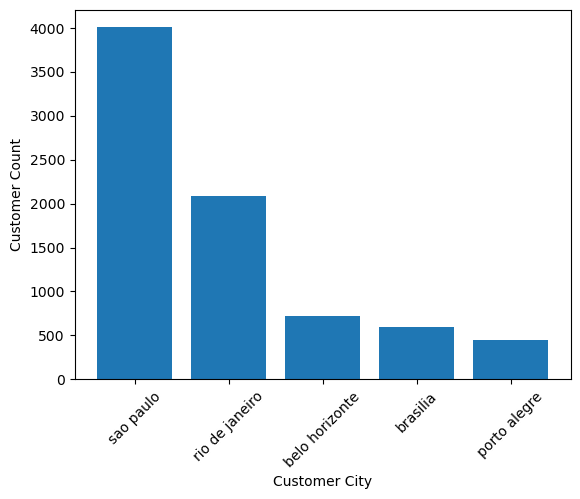

In [31]:
visualization_customer = customer_counts.head(5)

plt.bar(x = visualization_customer["customer_city"], height = visualization_customer["customer_count"])
plt.xticks(rotation=45)
plt.xlabel("Customer City")
plt.ylabel("Customer Count")

plt.show()

visualization_customer.to_csv("dashboard/visualisasi_banyak_customer.csv", index=False)

### Pertanyaan 2:

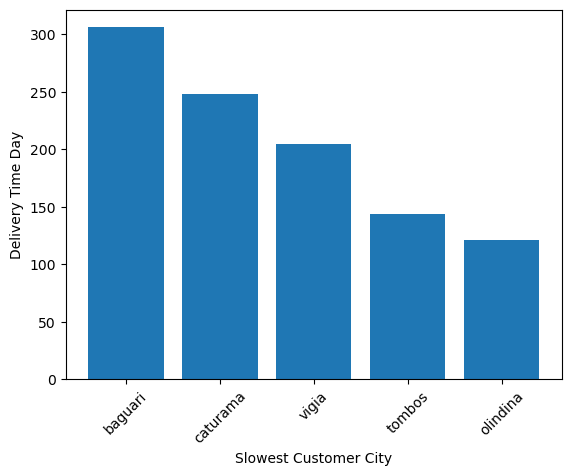

In [32]:
visualization_delivery_slowest = delivery_time_city.head(5)

plt.bar(x = visualization_delivery_slowest["customer_city"], height = visualization_delivery_slowest["delivery_time_day"])
plt.xticks(rotation = 45)
plt.xlabel("Slowest Customer City")
plt.ylabel("Delivery Time Day")
plt.show()

visualization_delivery_slowest.to_csv("dashboard/visualisasi_pengiriman_terlambat.csv", index=False)

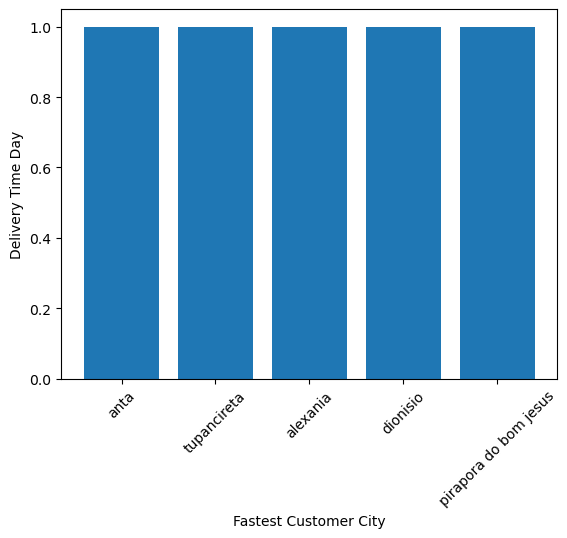

In [33]:
visualization_delivery_fastest = delivery_time_city.tail(5)

plt.bar(x = visualization_delivery_fastest["customer_city"], height = visualization_delivery_fastest["delivery_time_day"])
plt.xticks(rotation = 45)
plt.xlabel("Fastest Customer City")
plt.ylabel("Delivery Time Day")
plt.show()

visualization_delivery_fastest.to_csv("dashboard/visualisasi_pengiriman_tercepat.csv", index=False)

**Insight:**
- Berhasil dibuatnya visualisasi data untuk menjawab pertanyaan 1 dan 2.

## Analisis Lanjutan (Opsional)

In [34]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [35]:
delivery_location_df.head()

,customer_zip_code_prefix,customer_city,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,89254,jaragua do sul,89254.0,-26.468503,-49.109883
1,89254,jaragua do sul,89254.0,-26.481278,-49.116976
2,89254,jaragua do sul,89254.0,-26.467770,-49.108262
3,89254,jaragua do sul,89254.0,-26.480828,-49.122365
4,89254,jaragua do sul,89254.0,-26.473864,-49.101689


In [36]:
shape=gpd.read_file('data/ne_10m_admin_0_countries_bra.shp')
shape.plot()

DriverError: Failed to open dataset (flags=68): data/ne_10m_admin_0_countries_bra.shp

In [ ]:
geometry = [Point(xy) for xy in zip(delivery_location_df['geolocation_lng'], delivery_location_df['geolocation_lat'])]
geo_df = gpd.GeoDataFrame(delivery_location_df, geometry=geometry, crs="EPSG:4326")

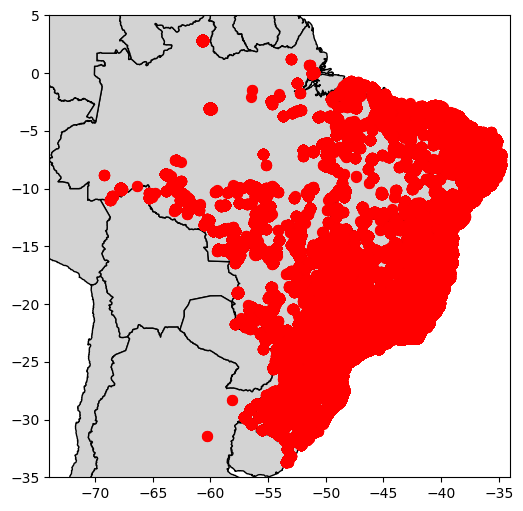

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
shape.plot(ax=ax, color='lightgrey', edgecolor='black')
geo_df.plot(ax=ax, markersize=50, color='red', marker='o', label='Locations')

ax.set_xlim(-74, -34)
ax.set_ylim(-35, 5)  

plt.show()

## Conclusion


- Pada 6 bulan terakhir pada tahun 2017 pelanggan tertinggi : sao paulo dengan 4005 pelanggan, rio de Janeiro dengan 2081 pelanggan, brasillia dengan 591 pelanggan, dan Porto alegre dengan 452 pelanggan.

- Di waktu yang sama 5 Kota dengan pengiriman terlambat adalah : dindina, tombos, vigia, caturuma, baguari. Dan 5 kota dengan pengiriman tercepat adalah: anta, tupancireta, alexania, dionisio, dan pirapora do bom jesus.

- Dari distribusi geografi pada brasil dapat dilihat kebanyakn pelanggan berasal dari bagian timur hingga selatan brasil